In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data.head()

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,1010,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,2110,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,1913,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,2111,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,1710,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [5]:
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수
0,10,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13
1,21,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29
2,19,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46
3,21,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54
4,17,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58


In [6]:
def get_encoding(data, category, target):
    df = pd.DataFrame(data[category])
    for i in range(len(df)):
        if df.iloc[i, 0] == target : df.iloc[i, 0] = 1
        else: df.iloc[i, 0] = 0
    data.drop(category, axis = 1, inplace= True)
    data = data.join(df)
    return data

In [8]:
data = get_encoding(data, '품목대분류코드', 15)

In [9]:
data.head()

,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,품목대분류코드
0,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,0
1,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,0
2,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,0
3,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,0
4,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,0


In [10]:
data['품목대분류코드'].value_counts()

0    485849
1     33448
Name: 품목대분류코드, dtype: int64

여성    58.045324
남성    41.954676
Name: 성별, dtype: float64
40대       30.124372
30대       27.717651
20대       18.915929
50대       15.444870
60대 이상     5.659531
20세 미만     2.137646
Name: 연령, dtype: float64
신혼영유아가구    33.182851
1인가구       23.714422
초중고자녀가구    20.620067
성인자녀가구     16.823128
노인가구        5.659531
Name: 가구생애주기, dtype: float64


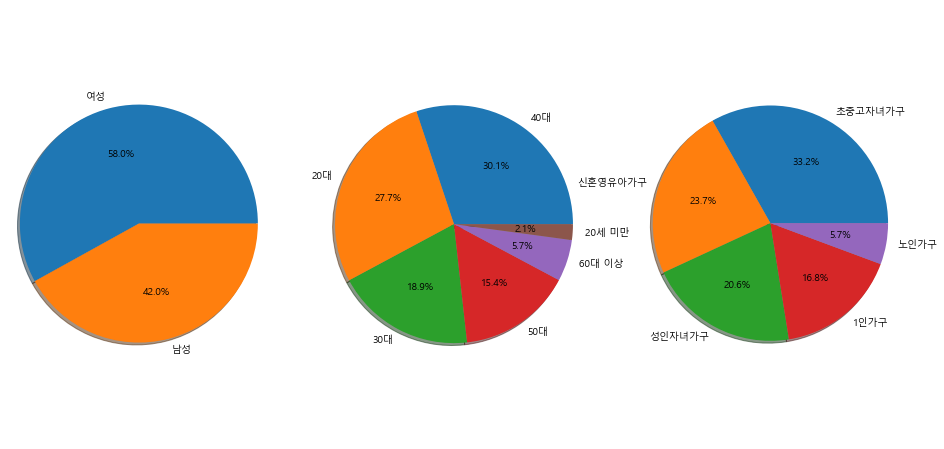

In [11]:
data_f = data[data['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령', '가구생애주기']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data[category].unique()
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')

In [12]:
data_f_Seoul = data_f[data_f['고객소재지_광역시도'] == '서울특별시']
df = pd.DataFrame(data_f_Seoul['고객소재지_시군구'].value_counts())
df.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df

,고객소재지_시군구,합계
0,중구,319
1,금천구,366
2,종로구,407
3,관악구,419
4,강북구,424
5,도봉구,466
6,양천구,478
7,중랑구,656
8,노원구,657
9,광진구,700


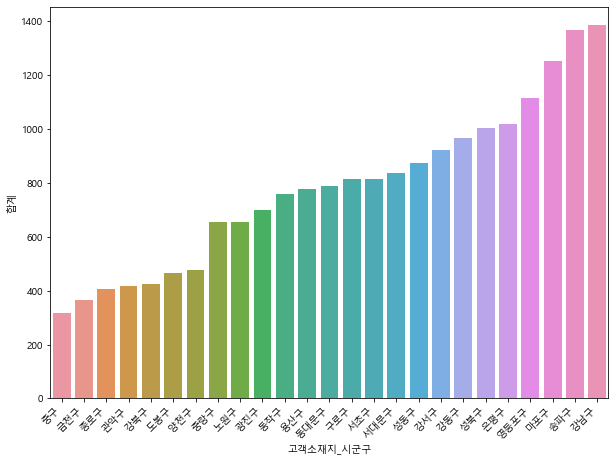

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(x = '고객소재지_시군구', y = '합계', data = df)
fig.autofmt_xdate(rotation = 45)

In [14]:
#인코딩 적용 함수 만들기
def get_dummies(column, df):
    dummies = pd.get_dummies(df[column])
    df.drop(column, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

In [15]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

In [16]:
data_dummies.head()

,매출금액,매출건수,품목대분류코드,강남구,강동구,강북구,강서구,강화군,계양구,고양시,...,양천구,연수구,영등포구,옹진군,용산구,용인시,은평구,종로구,중구,중랑구
0,782521,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,963789,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,924309,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1089360,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1656740,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0.93559
1    0.06441
Name: 품목대분류코드, dtype: float64


<AxesSubplot:xlabel='품목대분류코드', ylabel='count'>

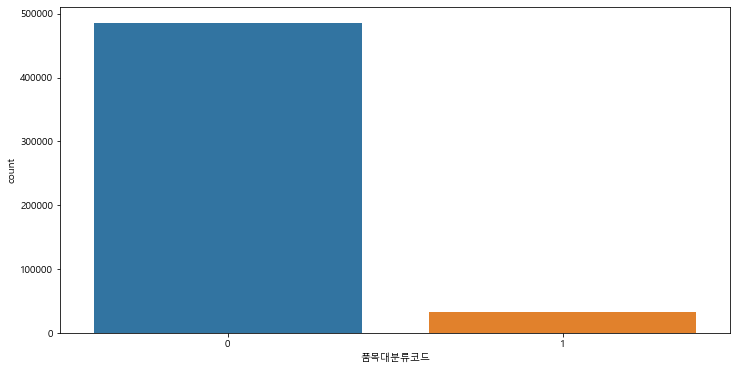

In [17]:
N = len(data_dummies)
print(data_dummies['품목대분류코드'].value_counts()/N)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.countplot(x = '품목대분류코드', data = data_dummies)

In [18]:
def get_preprocessed_df(df, category):
    df_copy = df.copy()
    scaled = np.log1p(df_copy[category])
    df_copy.insert(0, category + '_Scaled', scaled)
    df_copy.drop(category, axis = 1, inplace = True)
    return df_copy

<AxesSubplot:xlabel='매출금액_Scaled', ylabel='Density'>

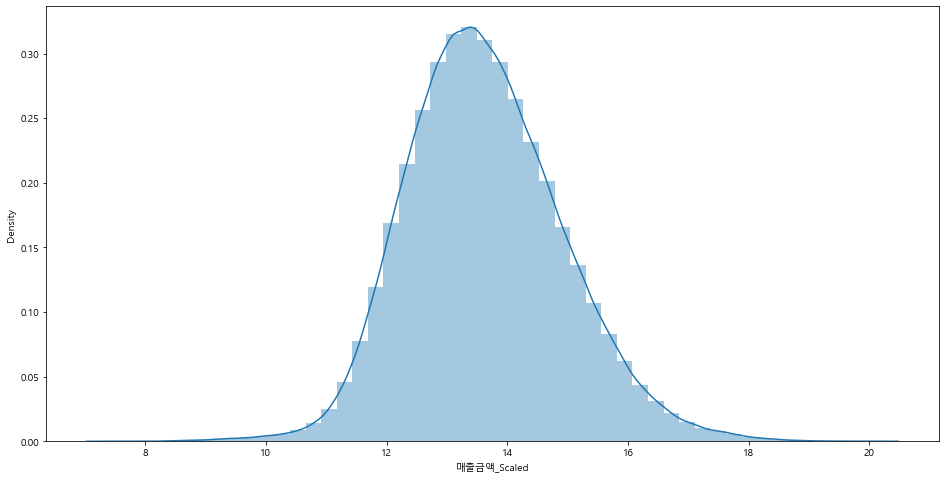

In [19]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액_Scaled'])

<AxesSubplot:xlabel='매출건수_Scaled', ylabel='Density'>

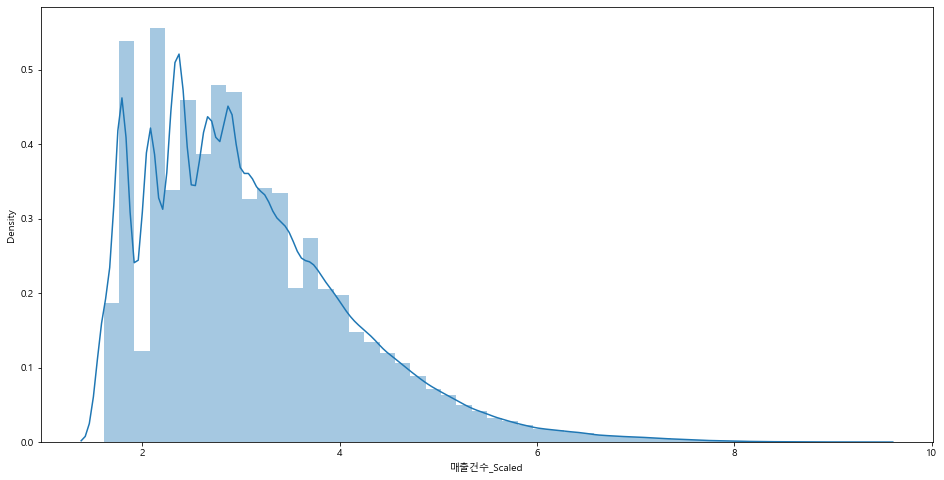

In [20]:
data_dummies = get_preprocessed_df(data_dummies, '매출건수')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수_Scaled'])

In [21]:
df_M_and_C = data_dummies[['매출금액_Scaled','매출건수_Scaled']]

target = data_dummies['품목대분류코드']
feature = df_M_and_C

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = pd.DataFrame(scaler.transform(feature), columns= feature.columns)

(array([0, 1]), [Text(0, 0, '매출금액_Scaled'), Text(1, 0, '매출건수_Scaled')])

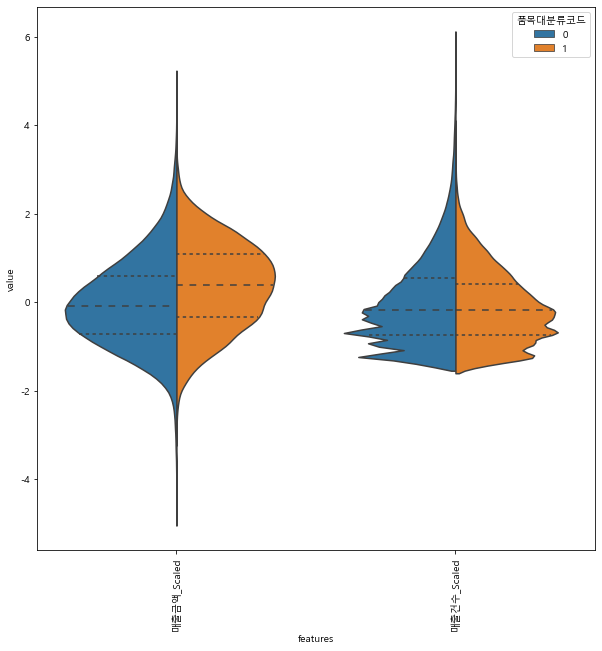

In [22]:
data = pd.concat([target, feature_scaled], axis = 1)
data = pd.melt(data, id_vars= '품목대분류코드', var_name= 'features', value_name= 'value')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x = 'features', y = 'value', hue = '품목대분류코드', data = data, split = True, inner = 'quart')
plt.xticks(rotation= 90)

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[91379  5791]
 [ 5669  1021]]
정확도 : 0.8897, 정밀도 : 0.1499, 재현율 : 0.1526, F1 : 0.1512, AUC : 0.5464
오차 행렬
[[93194  3976]
 [ 5943   747]]
정확도 : 0.9045, 정밀도 : 0.1582, 재현율 : 0.1117, F1 : 0.1309, AUC : 0.6587
오차 행렬
[[96969   201]
 [ 6586   104]]
정확도 : 0.9347, 정밀도 : 0.3410, 재현율 : 0.0155, F1 : 0.0297, AUC : 0.7333


In [26]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [27]:
from xgboost import XGBClassifier

data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 21)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

xgb_clf = XGBClassifier(n_estimators = 500)
gb_clf = GradientBoostingClassifier()
rf_clf = RandomForestClassifier()

clf_list = [xgb_clf, gb_clf, rf_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


[23:01:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[86756  1894]
 [10956  4254]]
정확도 : 0.8763, 정밀도 : 0.6919, 재현율 : 0.2797, F1 : 0.3984, AUC : 0.8077
오차 행렬
[[87564  1086]
 [12071  3139]]
정확도 : 0.8733, 정밀도 : 0.7430, 재현율 : 0.2064, F1 : 0.3230, AUC : 0.8022
오차 행렬
[[80965  7685]
 [ 9843  5367]]
정확도 : 0.8312, 정밀도 : 0.4112, 재현율 : 0.3529, F1 : 0.3798, AUC : 0.7464


In [28]:
ftr_importances = pd.Series(dt_clf.feature_importances_, index = X_features.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

Feature importance:\매출건수    0.697
매출금액    0.133
수원시     0.009
성남시     0.009
고양시     0.008
용인시     0.008
강남구     0.006
송파구     0.006
강서구     0.006
성북구     0.006
마포구     0.006
은평구     0.005
서초구     0.005
서구      0.005
영등포구    0.005
성동구     0.005
강동구     0.005
구로구     0.005
동대문구    0.005
서대문구    0.005
dtype: float64


<AxesSubplot:>

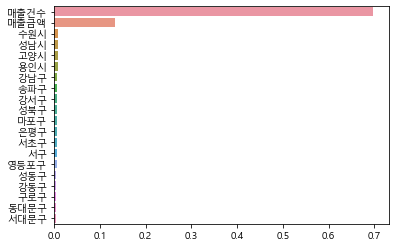

In [29]:
#feature importance 추출
print("Feature importance:\{0}".format(np.round(ftr_top20, 3)))

#feature importance를 column 별로 시각화하기
fig, ax = plt.subplots()
sns.barplot(x = ftr_top20, y = ftr_top20.index) 

In [30]:
def get_outlier_0(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


def get_outlier_1(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index    

In [31]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 16)

outlier_index = get_outlier_1(df = data, column='매출금액', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

outlier_index = get_outlier_1(df = data, column='매출건수', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
print(data_dummies.shape)

(509785, 41)


In [32]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

print(y_target.shape)
print(X_features.shape)

n = 8
pca = PCA(n_components= n)
data_pca = pca.fit_transform(X_features)
print(data_pca.shape)

pca_columns = []
for i in range(1, n + 1):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = np.array(y_target)

(509785,)
(509785, 40)
(509785, 8)


In [33]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators= 1000, num_leaves= 64, n_jobs= -1, boost_from_average = False)

clf_list = [dt_clf, lr_clf, lgbm_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[72234 18626]
 [ 7228  3869]]
정확도 : 0.7464, 정밀도 : 0.1720, 재현율 : 0.3487, F1 : 0.2304, AUC : 0.5719
오차 행렬
[[55511 35349]
 [ 4113  6984]]
정확도 : 0.6130, 정밀도 : 0.1650, 재현율 : 0.6294, F1 : 0.2614, AUC : 0.6618
오차 행렬
[[66593 24267]
 [ 4728  6369]]
정확도 : 0.7156, 정밀도 : 0.2079, 재현율 : 0.5739, F1 : 0.3052, AUC : 0.7385


In [34]:
xgb_clf = XGBClassifier(n_estimators = 1000)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 200, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.74392	validation_1-auc:0.74000
[1]	validation_0-auc:0.75137	validation_1-auc:0.74658
[2]	validation_0-auc:0.75314	validation_1-auc:0.74784
[3]	validation_0-auc:0.75553	validation_1-auc:0.75035
[4]	validation_0-auc:0.75722	validation_1-auc:0.75133
[5]	validation_0-auc:0.75918	validation_1-auc:0.75261
[6]	validation_0-auc:0.76010	validation_1-auc:0.75313
[7]	validation_0-auc:0.76073	validation_1-auc:0.75341
[8]	validation_0-auc:0.76295	validation_1-auc:0.75412
[9]	validation_0-auc:0.76756	validation_1-auc:0.75494
[10]	validation_0-auc:0.76864	validation_1-auc:0.75572
[11]	validation_0-auc:0.77035	validation_1-auc:0.75637
[12]	validation_0-auc:0.77223	validation_1-auc:0.75635
[13]	validation_0-auc:0.77405	validation_1-auc:0.75643
[14]	validation_0-auc:0.77470	validation_1-auc:0.75636
[15]	validation_0-auc:0.77683	validation_1-auc:0.75634
[16]	validation_0-auc:0.77813	validation_1-auc:0.75662
[17]	validation_0-auc:0.77987	validation_1-auc:0.75651
[18]	validation_0-au

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_over, y_train_over)
gb_pred = gb_clf.predict(X_test)
gb_pred_proba = gb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, gb_pred, gb_pred_proba)

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {
    'max_depth' : [5, 7],
    'min_child_weight' : [1, 3],
    'colsample_bytree' : [0.5, 0.75]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv = 3, verbose= 1)
grid_cv.fit(X_train_over, y_train_over, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators= 200)

params = {
    'num_leaves' : [32, 64],
    'max_depth' : [128, 160],
    'min_child_samples' : [60, 100],
    'subsample' : [0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid= params, cv = 3)
gridcv.fit(X_train_over, y_train_over, early_stopping_rounds =  30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
print('최고 auc: {0:.4f}'.format(roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')))
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))